In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer #To handles missing values by imputing with the mean
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor


In [2]:
## Arrivals

# Load the CSV file into a DataFrame
file_path = "data/cleaned_arrival_pax.csv"
arrivals = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
arrivals['Date'] = pd.to_datetime(arrivals['Date'])

# Extract hour information from 'Estimated 30 Min' column
arrivals['Hour'] = pd.to_numeric(arrivals['Estimated 30 Min'].str[:2], errors='coerce')

# Remove rows with NaN values in 'Hour' column
arrivals = arrivals.dropna(subset=['Hour'])

# Group by 'Date' and 'Hour' columns and sum the 'Arr Pax' values
arrivals_grouped = arrivals.groupby(['Date', 'Hour'])['Arr Pax'].sum().reset_index()

# Print the first few rows of the DataFrame to confirm the changes
print(arrivals_grouped.head())

output_file_path = "arrivals_grouped.csv"
print("Arrivals Dataframe")
print(f"DataFrame saved as {output_file_path}")


        Date  Hour  Arr Pax
0 2019-01-01   0.0      224
1 2019-01-01   1.0        3
2 2019-01-01   4.0      160
3 2019-01-01   5.0       74
4 2019-01-01   6.0      578
Arrivals Dataframe
DataFrame saved as arrivals_grouped.csv


In [3]:
## Data Considerations
#The trend of people arriving at the airport was reviewed in a graph
# The variation before and after the pandemic, in the years 2020 and 2021, is very noticeable.
# We consider the year 2022 appropriate to make a forecast model
# Also 2022 is the 1st year after the pandemic with information for a full year

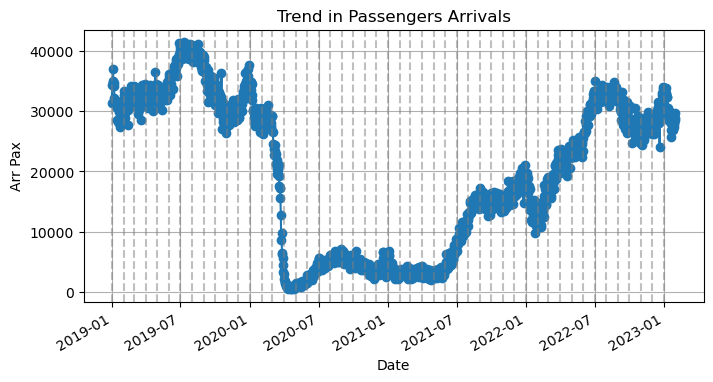

In [4]:
# Convert 'Date' column to datetime format
arrivals_grouped['Date'] = pd.to_datetime(arrivals_grouped['Date'])

# Group by 'Date' and calculate the sum of 'Arr Pax' for each day
daily_arrivals = arrivals_grouped.groupby('Date')['Arr Pax'].sum()

# Plot the line chart
plt.figure(figsize=(8, 4))
daily_arrivals.plot(kind='line', marker='o', linestyle='-')

# Add vertical lines delimiting each month
for year in range(daily_arrivals.index.min().year, daily_arrivals.index.max().year + 1):
    for month in range(1, 13):
        first_day_of_month = pd.Timestamp(year, month, 1)
        if first_day_of_month in daily_arrivals.index:
            plt.axvline(x=first_day_of_month, color='gray', linestyle='--', alpha=0.5)

plt.title('Trend in Passengers Arrivals')
plt.xlabel('Date')
plt.ylabel('Arr Pax')
plt.grid(True)
plt.show()

In [5]:
# Filter the 'Date' column for only the year 2022
arrivals_grouped = arrivals_grouped[pd.to_datetime(arrivals_grouped['Date']).dt.year == 2022]

# Save the filtered DataFrame to a CSV file
output_file_path = "arrivals_date_hour.csv"
arrivals_grouped.to_csv(output_file_path, index=False)

# Print the first few rows of the filtered DataFrame to confirm the changes
print(arrivals_grouped.head())

print("Arrivals Dataframe for 2022")
print(f"DataFrame saved as {output_file_path}")


            Date  Hour  Arr Pax
20827 2022-01-01   0.0       71
20828 2022-01-01   1.0      502
20829 2022-01-01   6.0      438
20830 2022-01-01   7.0     1996
20831 2022-01-01   8.0      706
Arrivals Dataframe for 2022
DataFrame saved as arrivals_date_hour.csv


In [6]:
## Develop of Rideshare dataframe (External platforms Uber, Lyft, etc.)

## Develop of Rideshare dataframe (External platforms Uber, Lyft, etc.)

# Load the CSV file into a DataFrame
file_path = "data/cleaned_rideshare.csv"
rideshare = pd.read_csv(file_path)

# Convert 'PickupDepDT' column to datetime format
rideshare['PickupDepDT'] = pd.to_datetime(rideshare['PickupDepDT'])

# Add separate columns for date, time, and hour
rideshare['Date'] = rideshare['PickupDepDT'].dt.date
rideshare['Hour'] = rideshare['PickupDepDT'].dt.hour

# Add a new column named 'Count' with all values equal to 1
rideshare['Rideshare_Count'] = 1

# Group by 'Date' and 'Hour' columns and sum the 'Count' values
rideshare_grouped = rideshare.groupby(['Date', 'Hour'], as_index=False)['Rideshare_Count'].sum()

# Filter the 'Date' column for only the year 2022
rideshare = rideshare[pd.to_datetime(rideshare['Date']).dt.year == 2022]

print("Rideshare Dataframe")
# Print the resulting DataFrame
print(rideshare_grouped.head())

# Save the DataFrame to a CSV file
output_file_path = "rideshare_date_hour.csv"
rideshare_grouped.to_csv(output_file_path, index=False)

print(f"DataFrame saved as {output_file_path}")



Rideshare Dataframe
         Date  Hour  Rideshare_Count
0  2021-07-31    23                1
1  2021-12-31    21                3
2  2021-12-31    23                9
3  2022-01-01     0                3
4  2022-01-01     4                6
DataFrame saved as rideshare_date_hour.csv


In [7]:
## Develop of Taxis dataframe (licensed taxis at the taxi stand)

# Load the CSV file into a DataFrame
file_path = "data/cleaned_taxi.csv"
taxi = pd.read_csv(file_path)

# Convert 'Entry.time' column to datetime format
taxi['Entry.time'] = pd.to_datetime(taxi['Entry.time'])

# Extract date component and create a new column 'Date'
taxi['Date'] = taxi['Entry.time'].dt.date

# Filter the DataFrame by the 'Complete.trip' column to keep only 'Yes' values
taxi_filtered = taxi[taxi['Complete.trip'] == 'Yes']

# Rename the column 'Entry.hour' to 'Hour'
taxi_filtered = taxi_filtered.rename(columns={'Entry.hour': 'Hour'})

# Add a new column named 'Count' with all values equal to 1
taxi_filtered['Count'] = 1

# Group by 'Date' and 'Hour' columns and sum the 'Count' values
taxi_grouped = taxi_filtered.groupby(['Date', 'Hour'], as_index=False)['Count'].sum()

# Rename the 'Count' column to 'Taxi_Count'
taxi_grouped = taxi_grouped.rename(columns={'Count': 'Taxi_Count'})

# Filter the 'Date' column for only the year 2022
taxi_grouped = taxi_grouped[pd.to_datetime(taxi_grouped['Date']).dt.year == 2022]

# Select only the desired columns in the final dataframe
taxi_grouped = taxi_grouped[['Date', 'Hour', 'Taxi_Count']]

print("Taxi Dataframe")
# Print the resulting DataFrame
print(taxi_grouped.head())

# Save the DataFrame to a CSV file
output_file_path = "taxi_date_hour.csv"
taxi_grouped.to_csv(output_file_path, index=False)

print(f"DataFrame saved as {output_file_path}")


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22944\963270837.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi = pd.read_csv(file_path)


Taxi Dataframe
             Date  Hour  Taxi_Count
30875  2022-01-01   0.0          78
30876  2022-01-01   1.0          66
30877  2022-01-01   2.0          46
30878  2022-01-01   3.0          48
30879  2022-01-01   4.0           4
DataFrame saved as taxi_date_hour.csv


In [8]:
## Develop weather dataframe
# Load the CSV file into a DataFrame
file_path_climate = "data/climate-daily.csv"
climate_data = pd.read_csv(file_path_climate)

# Convert 'LOCAL_DATE' column to datetime format
climate_data['LOCAL_DATE'] = pd.to_datetime(climate_data['LOCAL_DATE'])

# Add a new column named 'Date' with only the date component
climate_data['Date'] = climate_data['LOCAL_DATE'].dt.date

# Select the desired columns
Weather_Dataframe = climate_data[['Date', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE']]

# Filter the 'Date' column for only the year 2022
Weather_Dataframe = Weather_Dataframe[pd.to_datetime(Weather_Dataframe['Date']).dt.year == 2022]

# Print the first few rows of the DataFrame to confirm the changes
print(Weather_Dataframe.head())

# Save the DataFrame to a CSV file
output_file_path = "weather_date_2022.csv"
Weather_Dataframe.to_csv(output_file_path, index=False)

print(f"DataFrame saved as {output_file_path}")

            Date  MEAN_TEMPERATURE  MIN_TEMPERATURE  MAX_TEMPERATURE
1084  2022-01-01              -4.1             -9.4              1.3
1085  2022-01-02               3.1              0.7              5.6
1086  2022-01-03               3.6              1.8              5.4
1087  2022-01-04               2.7              0.3              5.2
1088  2022-01-05              -1.1             -3.5              1.4
DataFrame saved as weather_date_2022.csv


In [9]:
# Load the dataframes from the CSV files
arrivals_df = pd.read_csv('data/arrivals_date_hour.csv')
rideshare_df = pd.read_csv('data/rideshare_date_hour.csv')
taxi_df = pd.read_csv('data/taxi_date_hour.csv')
weather_df = pd.read_csv('data/weather_date_2022.csv')

In [10]:
# Display the first few rows of each dataframe
print("Arrivals dataframe:")
print(arrivals_df.head())
print("\nRideshare dataframe:")
print(rideshare_df.head())
print("\nTaxi dataframe:")
print(taxi_df.head())
print("\nWeather dataframe:")
print(weather_df.head())

Arrivals dataframe:
         Date  Hour  Arr Pax
0  2022-01-01   0.0       71
1  2022-01-01   1.0      502
2  2022-01-01   6.0      438
3  2022-01-01   7.0     1996
4  2022-01-01   8.0      706

Rideshare dataframe:
         Date  Hour  Rideshare_Count
0  2021-07-31    23                1
1  2021-12-31    21                3
2  2021-12-31    23                9
3  2022-01-01     0                3
4  2022-01-01     4                6

Taxi dataframe:
         Date  Hour  Taxi_Count
0  2022-01-01   0.0          78
1  2022-01-01   1.0          66
2  2022-01-01   2.0          46
3  2022-01-01   3.0          48
4  2022-01-01   4.0           4

Weather dataframe:
         Date  MEAN_TEMPERATURE  MIN_TEMPERATURE  MAX_TEMPERATURE
0  2022-01-01              -4.1             -9.4              1.3
1  2022-01-02               3.1              0.7              5.6
2  2022-01-03               3.6              1.8              5.4
3  2022-01-04               2.7              0.3              5.2
4  

In [11]:
# Merge dataframes based on common columns (Date and Hour)
merged_df = pd.merge(arrivals_df, rideshare_df, on=['Date', 'Hour'])
merged_df = pd.merge(merged_df, taxi_df, on=['Date', 'Hour'])
merged_df = pd.merge(merged_df, weather_df, on='Date')


In [12]:
# Display the size of the merged dataframe
print("\nSize of Merged dataframe:")
print("Rows:", merged_df.shape[0])
print("Columns:", merged_df.shape[1])

# Display the merged dataframe
print("\nMerged dataframe:")
print(merged_df.head())

# Summary statistics
summary_stats = merged_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Size of Merged dataframe:
Rows: 1284
Columns: 8

Merged dataframe:
         Date  Hour  Arr Pax  Rideshare_Count  Taxi_Count  MEAN_TEMPERATURE  \
0  2022-01-01   0.0       71                3          78              -4.1   
1  2022-01-01  11.0      979                3          80              -4.1   
2  2022-01-01  13.0     1124                3         136              -4.1   
3  2022-01-01  14.0     1146                6         118              -4.1   
4  2022-01-01  15.0      819                3         144              -4.1   

   MIN_TEMPERATURE  MAX_TEMPERATURE  
0             -9.4              1.3  
1             -9.4              1.3  
2             -9.4              1.3  
3             -9.4              1.3  
4             -9.4              1.3  

Summary Statistics:
              Hour      Arr Pax  Rideshare_Count   Taxi_Count  \
count  1284.000000  1284.000000      1284.000000  1284.000000   
mean     14.402648  1310.210280         3.733645    79.767913   
std       6.7

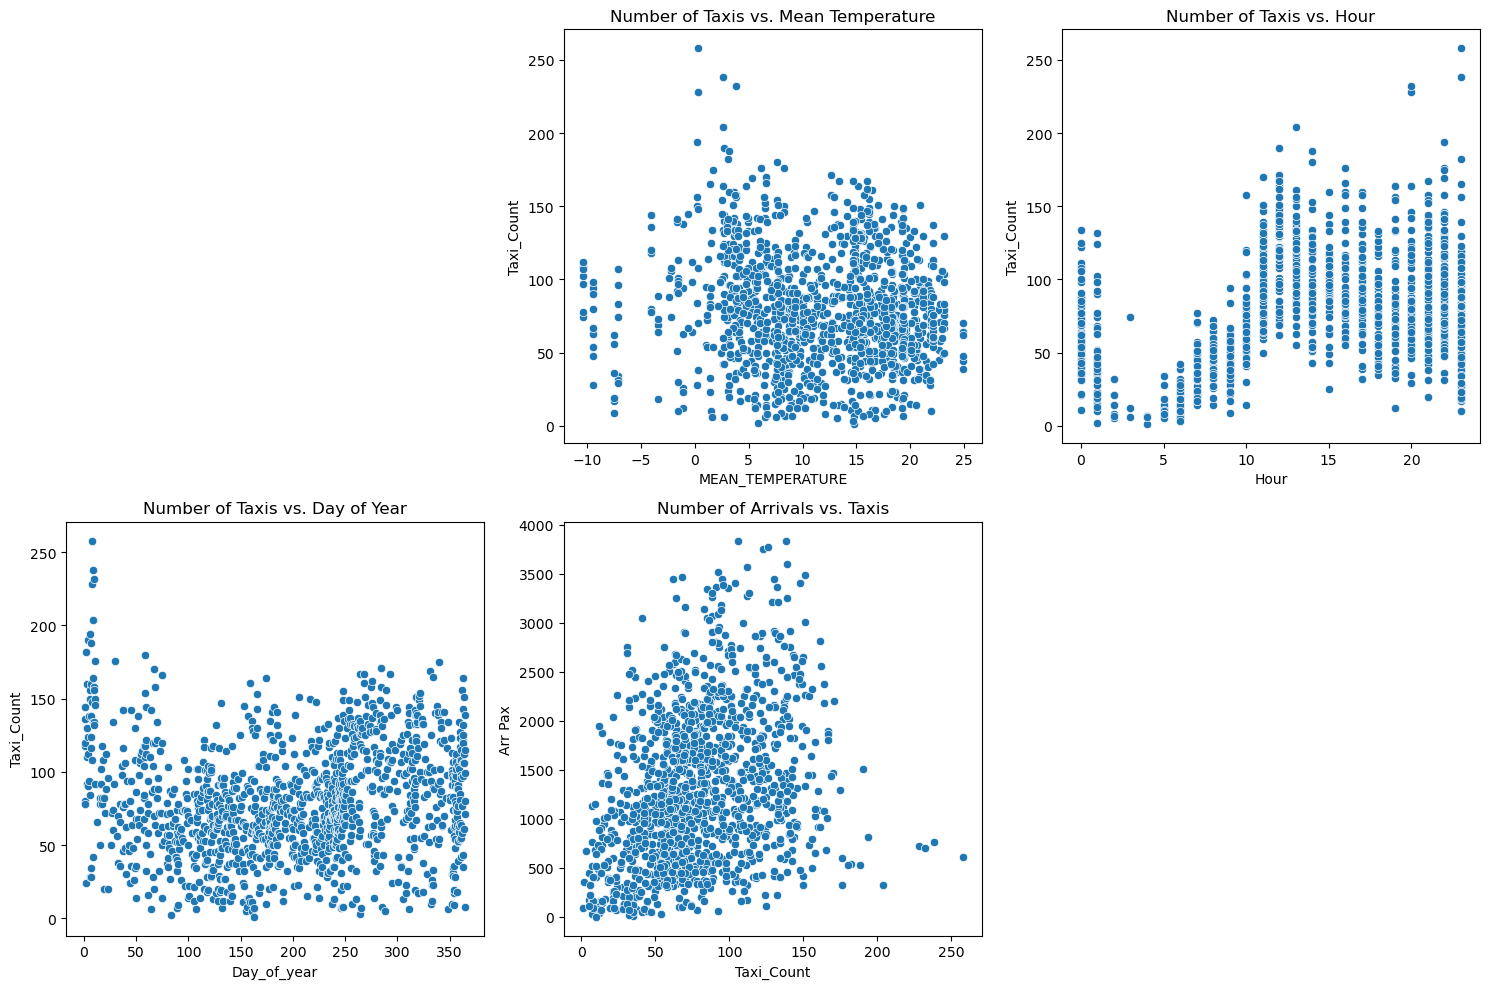

In [13]:
# Visualize the relationship between variables using scatter plots

# Convert 'Date' column to datetime data type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the day of the year from the 'Date' column
merged_df['Day_of_year'] = merged_df['Date'].dt.dayofyear

# Visualize the relationship between variables using scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 2)
sns.scatterplot(x='MEAN_TEMPERATURE', y='Taxi_Count', data=merged_df)
plt.title('Number of Taxis vs. Mean Temperature')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Hour', y='Taxi_Count', data=merged_df)
plt.title('Number of Taxis vs. Hour')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Day_of_year', y='Taxi_Count', data=merged_df)  # Use the corrected column name
plt.title('Number of Taxis vs. Day of Year')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Taxi_Count', y='Arr Pax', data=merged_df)
plt.title('Number of Arrivals vs. Taxis')

plt.tight_layout()
plt.show()


In [14]:
## Model 1 : Multiple Linear Regression
# This model analyze the relationship between multiple independent variables (features) and a dependent variable (target)
# The dependent variable is Taxi_Count, and the independent variables are Arr Pax, MEAN_TEMPERATURE, Hour, and Day_of_year

# Define features (X) and target variable (y)
X = merged_df[['Arr Pax', 'MEAN_TEMPERATURE', 'Hour', 'Day_of_year']]
y = merged_df['Taxi_Count']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data (using the same imputer fitted on the training data)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1257.952660278639


In [15]:
## Model 2: Decision Tree Regression

# This model employs a Decision Tree Regression algorithm to predict taxi counts 
# Based on features: Arr Pax, mean temperature, hour, and day of the year
# splits the data into training and testing sets, trains the model on the training data

# Define features (X) and target variable (y)
X = merged_df[['Arr Pax', 'MEAN_TEMPERATURE', 'Hour', 'Day_of_year']]
y = merged_df['Taxi_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (Decision Tree Regression):", mse)

Mean Squared Error (Decision Tree Regression): 670.5289125153719


In [16]:
# Comparing three methods, the lowest MSE is in the decision tree regression model = 670.5289125153719